# Distribution of High - Low - Analytics

### Import Library

In [4]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [5]:
import os
from pathlib import Path
notebook_path = os.getcwd()
current_dir = Path(notebook_path)
csv_file = str(current_dir) + '/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [6]:
data = dataset.copy()

In [7]:
daily_data = data.copy().resample('D').agg({
        'Volume': 'sum',
        'Open': 'first',
        'Close': 'last',
        'High': 'max',
        'Low': 'min'
    })
daily_data.dropna(subset=['Close'], inplace=True)

In [8]:
dfd = daily_data[['High', 'Low']].copy().rename(columns={'High': 'day_High', 'Low': 'day_Low'})
dfc = data.copy()
dfc = dfc.assign(time_d=pd.PeriodIndex(dfc.index, freq='1D').to_timestamp())
df_merged = pd.merge(dfc, dfd, left_on="time_d", right_index=True, how="left")
df_merged['is_max'] = df_merged['High'] == df_merged['day_High']
df_merged['is_min'] = df_merged['Low'] == df_merged['day_Low']
df_merged['hour'] = df_merged.index.hour
df_merged['minute'] = df_merged.index.minute

## 2. RSI & Time analytics

In [10]:
df2 = df_merged.copy()
df2['RSI'] = ta.rsi(df2["Close"], length=14)
df2['RSI'] = round(df2['RSI'])
df2 = df2[(df2.is_max == True) | (df2.is_min == True)].copy()
group_1 = df2[df2.is_min == True]
group_2 = df2[df2.is_max == True]

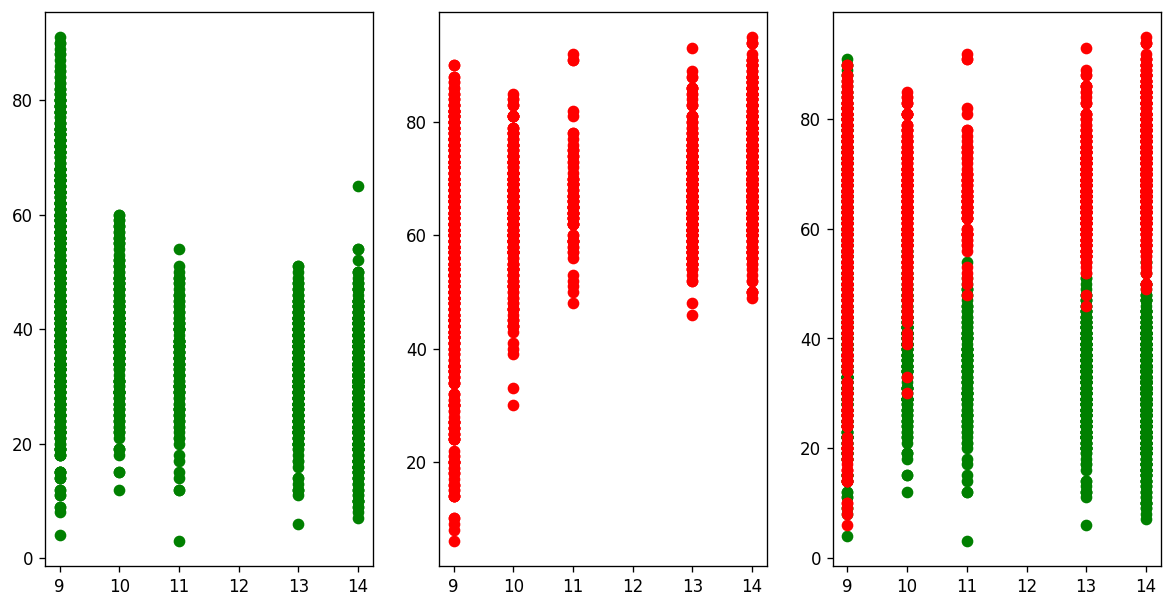

In [12]:
plt.subplot(1, 3, 1)
plt.scatter(group_1['hour'], group_1['RSI'], c='green')
plt.subplot(1, 3, 2)
plt.scatter(group_2['hour'], group_2['RSI'], c='red')
plt.subplot(1, 3, 3)
plt.scatter(group_1['hour'], group_1['RSI'], c='green')
plt.scatter(group_2['hour'], group_2['RSI'], c='red')

In [ ]:
# Ket luan:
# 9h rat nhieu trap
# 10hxx neu 10hxx tao gia cao nhat trong ngay, RSI > 40, xuat hien dau hieu dao chieu => Short
# 10hxx neu 10hxx tao gia thap nhat trong ngay, RSI < 60, xuat hien dau hieu dao chieu => Long
# 11hxx neu 11hxx tao gia cao nhat trong ngay, RSI > 45, xuat hien dau hieu dao chieu => Short
# 11hxx neu 11hxx tao gia thap nhat trong ngay, RSI < 55, xuat hien dau hieu dao chieu => Long
# 13hxx neu 13hxx tao gia cao nhat trong ngay, RSI > 45, xuat hien dau hieu dao chieu => Short
# 13hxx neu 13hxx tao gia thap nhat trong ngay, RSI < 55, xuat hien dau hieu dao chieu => Long
# 14hxx neu 14hxx tao gia cao nhat trong ngay, RSI > 45, xuat hien dau hieu dao chieu => Short
# 14hxx neu 14hxx tao gia thap nhat trong ngay, RSI < 55, xuat hien dau hieu dao chieu => Long

## 1. Analytics by Time

In [13]:
analytics_data = df_merged[(df_merged.is_max == True) | (df_merged.is_min == True)].copy()

<Axes: xlabel='hour'>

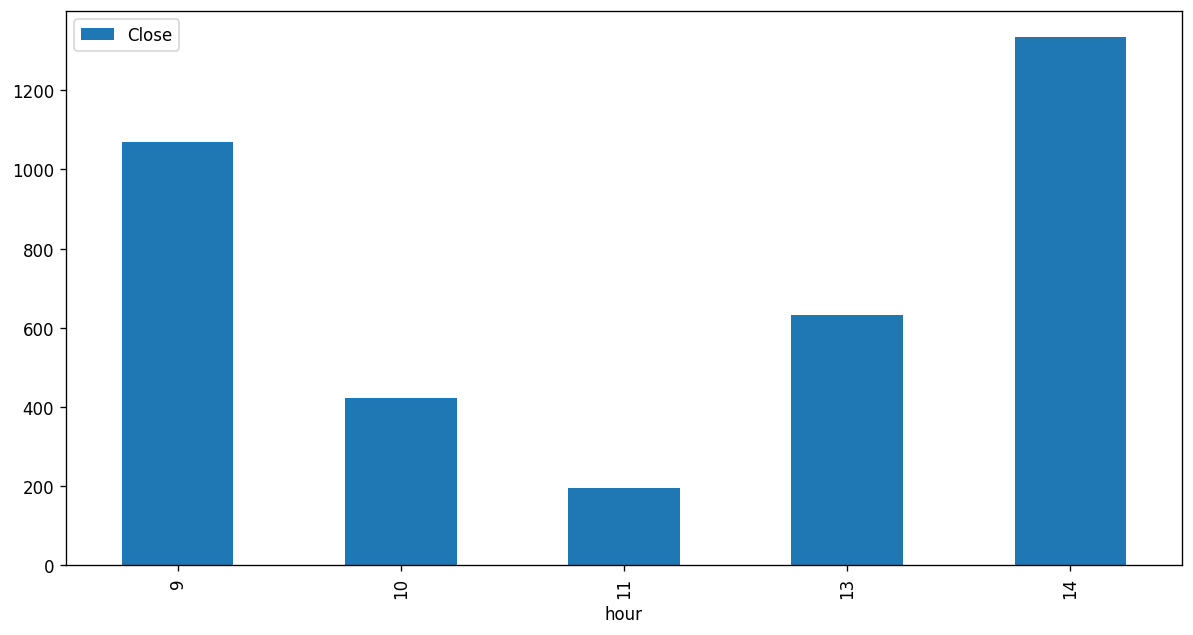

In [14]:
analytics_data_grouped_by_hour = analytics_data.groupby(['hour'])[['Close']].count()
analytics_data_grouped_by_hour.plot.bar()

<Axes: xlabel='hour'>

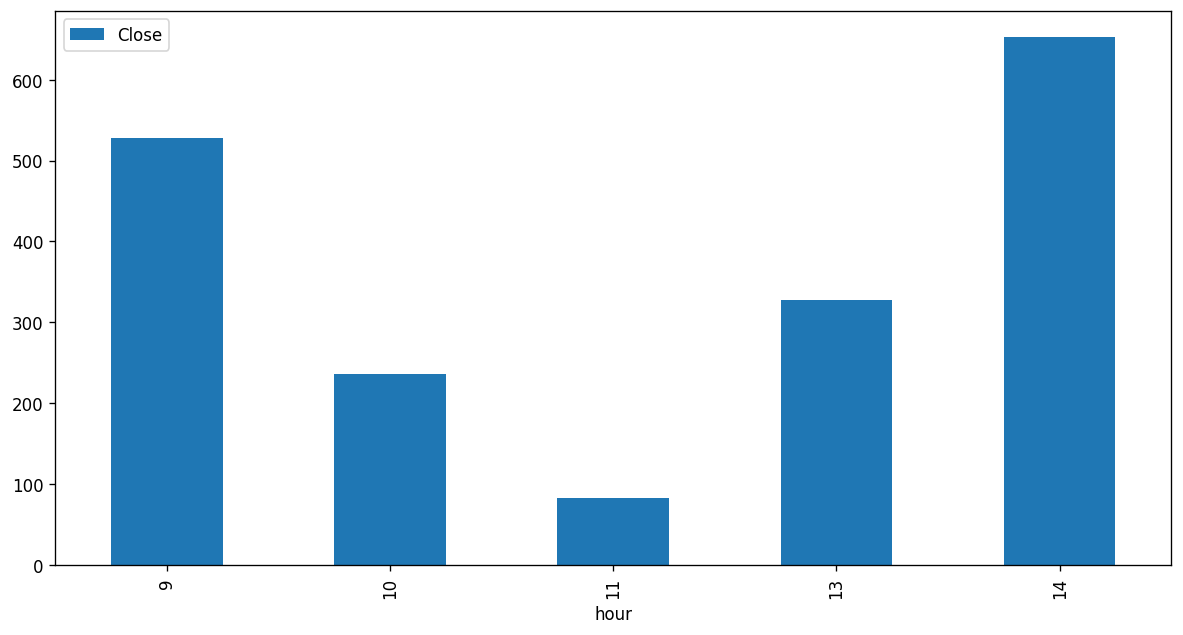

In [15]:
max_data = analytics_data[analytics_data.is_max == True]
max_data_grouped_by_hour = max_data.groupby(['hour'])[['Close']].count()
max_data_grouped_by_hour.plot.bar()

<Axes: xlabel='hour'>

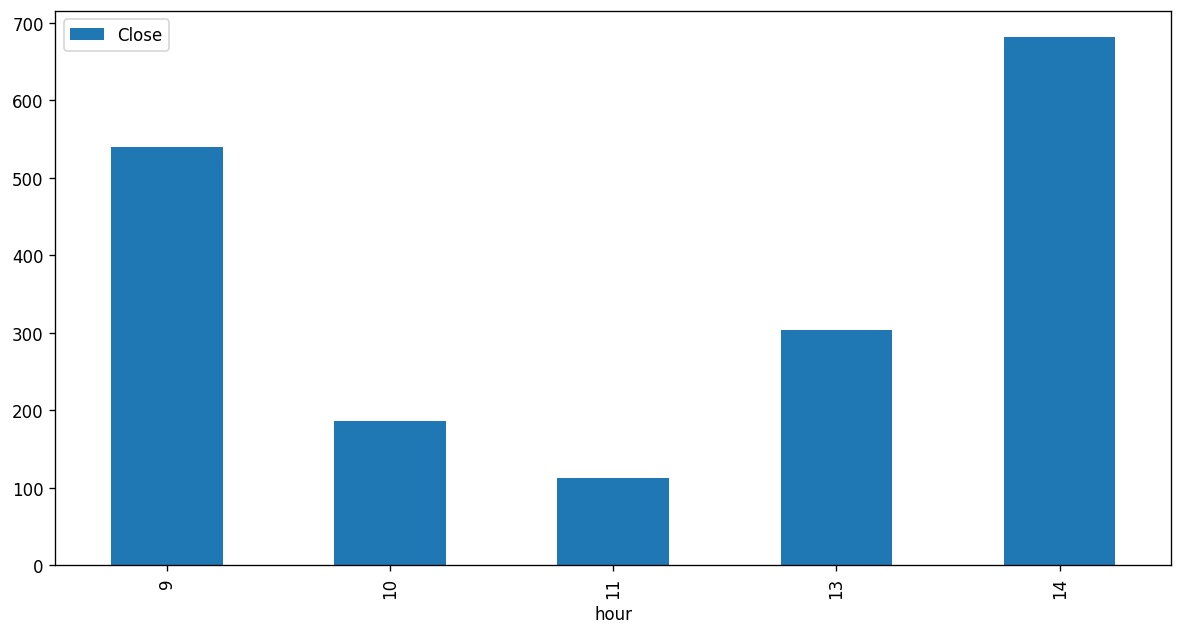

In [16]:
min_data = analytics_data[analytics_data.is_min == True]
min_data_grouped_by_hour = min_data.groupby(['hour'])[['Close']].count()
min_data_grouped_by_hour.plot.bar()